In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA# ar and ima
from statsmodels.tsa.stattools import adfuller#time series is stationary or not


In [2]:
matches=pd.read_csv(r"C:\Users\shata\OneDrive\Desktop\puthon\matches.csv")

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.drop('method',axis=1,inplace=True)
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [5]:
#handling missing values
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].mean())
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [6]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [7]:
#Handling Duplicates

In [8]:
#Handling duplicates in team
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
matches.replace(to_replace=team_dup,inplace=True)

In [9]:
#Handling duplicates in city
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)

C:\Users\shata\AppData\Local\Temp\ipykernel_9072\95349859.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].replace(to_replace=city_dup,inplace=True)


In [10]:
#Handling duplicates in venue
matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)

In [11]:

matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

In [12]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
15
34


In [13]:
#convert date col to date and time

In [14]:
matches['date']=pd.to_datetime(matches["date"])
matches.head(10)

C:\Users\shata\AppData\Local\Temp\ipykernel_9072\1093415355.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  matches['date']=pd.to_datetime(matches["date"])


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,Rajiv Gandhi International Stadium,Deccan Chargers,Delhi Capitals,Deccan Chargers,bat,Delhi Capitals,wickets,9.0,143.0,20.0,N,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,MA Chidambaram Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,Rajiv Gandhi International Stadium,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,Punjab Cricket Association Stadium,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,Aleem Dar,AM Saheba


In [15]:
#reshape and calculate team metrix
team_performance=matches.melt(
    id_vars=["id","season","date","winner","result","result_margin","target_runs"],
    value_vars=["team1","team2"],
    var_name="home_or_away",
    value_name="team"
)
team_performance["is_winner"]=(team_performance["team"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]
team_performance.head()

,id,season,date,winner,result,result_margin,target_runs,home_or_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,runs,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,runs,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Capitals,wickets,9.0,130.0,team1,Delhi Capitals,1,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,wickets,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,wickets,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [16]:
#aggreated data for each team
team_performance_agg =team_performance.groupby(["team" ,"date"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] =team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
1,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
2,Chennai Super Kings,2008-04-19,1,241.0,241.0,0.0
3,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
4,Delhi Capitals,2008-04-19,1,130.0,130.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Bangalore,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [17]:
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] ==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
9,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
23,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
30,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
37,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2167,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [18]:
team_data = team_data.sort_values("date")
team_data.set_index("date",inplace=True)
team_data

,team,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


In [19]:
#create virtual environment

In [20]:
#stationary check read abt adfuller like the range -ve,0,+ve
time_series=team_data['runs_scored']
adf_result=adfuller(time_series)
print("ADF statistic", adf_result[0])
print("p value", adf_result[1])
if adf_result[1]>0.05:
  print("not stat")

ADF statistic -7.214074913565803
p value 2.1963196715517275e-10


In [21]:
if adf_result[1]>0.05:
  time_series_dif=time_series.diff().dropna()
else:
  time_series_dif=time_series

In [24]:
actual_runs=test.values
forecast_runs=forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print("Mean absolute error",mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print("Root mean squared error",rmse)

NameError: name 'forecast' is not defined

In [25]:
model=ARIMA(train,order=(1,1,1)) #(1,1,1) performance ----- 10 matches he is gettibg more score in first 8 but not in last 2 back
fitted_model=model.fit()

C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
forecast=fitted_model.forecast(steps=len(test))
forecast.index=test.index
forecast.head(5)

C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


date
2021-09-23    160.975878
2021-09-26    166.173245
2021-09-28    166.570630
2021-10-01    166.601014
2021-10-03    166.603337
Name: predicted_mean, dtype: float64

In [27]:
actual_runs=test.values
forecast_runs=forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print("Mean absolute error",mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print("Root mean squared error",rmse)

Mean absolute error 28.84228337144472
Root mean squared error 37.5213765172496


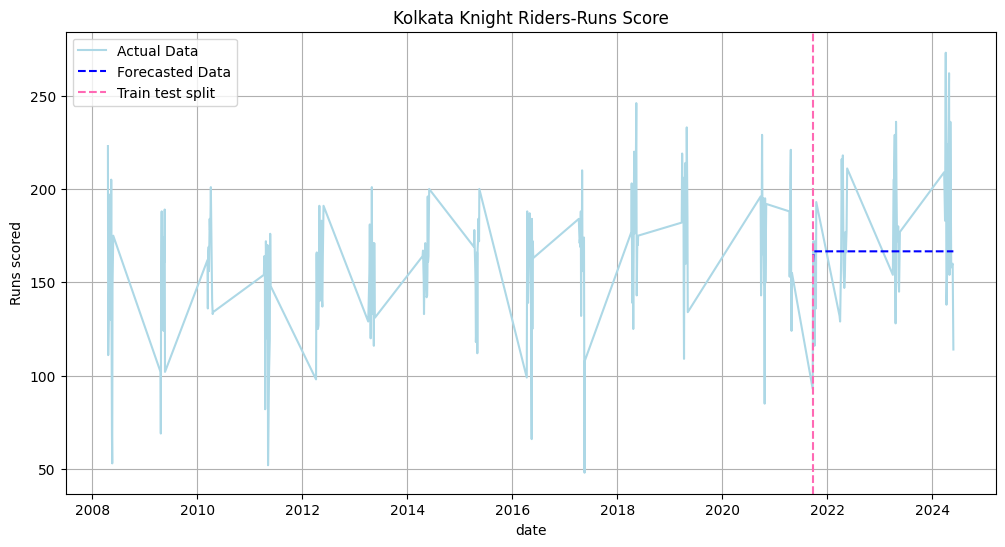

In [32]:
plt.figure(figsize=(12,6))
plt.plot(time_series_dif,label="Actual Data",color='lightblue')
plt.plot(forecast,label="Forecasted Data",color='blue',linestyle="--")
plt.axvline(x=test.index[0],color='hotpink',linestyle="--",label="Train test split")
plt.title(f"{team_name}-Runs Score")
plt.xlabel("date")
plt.ylabel("Runs scored")
plt.legend()
plt.grid()

In [33]:
#Load deliveries data


In [34]:
deliveries=pd.read_csv(r"C:\Users\shata\OneDrive\Desktop\puthon\deliveries.csv")

In [35]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [36]:
deliveries.sample(15)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
131853,980979,1,Sunrisers Hyderabad,Rising Pune Supergiants,15,4,MC Henriques,A Zampa,KS Williamson,1,0,1,NaN,0,NaN,NaN,NaN
233194,1359504,2,Lucknow Super Giants,Gujarat Titans,7,5,KL Rahul,Noor Ahmad,KH Pandya,1,0,1,NaN,0,NaN,NaN,NaN
111174,829723,1,Chennai Super Kings,Kolkata Knight Riders,19,4,A Nehra,AD Russell,RG More,1,0,1,NaN,0,NaN,NaN,NaN
36478,419144,2,Delhi Daredevils,Kolkata Knight Riders,3,2,G Gambhir,AB Agarkar,V Sehwag,0,0,0,NaN,0,NaN,NaN,NaN
151250,1136564,1,Rajasthan Royals,Sunrisers Hyderabad,9,6,SV Samson,Shakib Al Hasan,RA Tripathi,2,0,2,NaN,0,NaN,NaN,NaN
8234,336017,1,Kolkata Knight Riders,Delhi Daredevils,1,6,A Chopra,PJ Sangwan,Salman Butt,1,0,1,NaN,0,NaN,NaN,NaN
80103,598013,1,Kolkata Knight Riders,Sunrisers Hyderabad,18,2,EJG Morgan,DW Steyn,JH Kallis,6,0,6,NaN,0,NaN,NaN,NaN
257267,1426294,1,Delhi Capitals,Rajasthan Royals,13,3,RR Pant,YS Chahal,T Stubbs,1,0,1,NaN,0,NaN,NaN,NaN
258031,1426297,2,Chennai Super Kings,Gujarat Titans,8,4,DJ Mitchell,Noor Ahmad,MM Ali,1,0,1,NaN,0,NaN,NaN,NaN
191042,1216541,1,Mumbai Indians,Rajasthan Royals,16,5,SS Tiwary,JC Archer,HH Pandya,4,0,4,NaN,0,NaN,NaN,NaN


In [37]:
deliveries.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [38]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [39]:
#Handling duplicates in team
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
deliveries.replace(to_replace=team_dup,inplace=True)

In [40]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [41]:
vkohli=deliveries[deliveries.batter=="V Kohli"]
vkohli_score=vkohli.groupby('match_id')['batsman_runs'].sum().reset_index()
vkohli_score_sub=vkohli_score.head(239)
vkohli_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [42]:
#preparing data
vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))
vkohli_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

C:\Users\shata\AppData\Local\Temp\ipykernel_9072\2652151109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


In [43]:
batter=deliveries.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()
batter_scores=batter.groupby('batter')['batsman_runs'].sum().reset_index()
batter_scores=batter_scores.sort_values(by="batsman_runs",ascending=False)
top_batter_scores=batter_scores.head(10)

In [44]:
print(top_batter_scores)
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  print(score)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
V Kohli
       match_id   batter  batsman_runs
13       335982  V Kohli             1
56       335985  V Kohli            23
168      335992  V Kohli            13
224      335996  V Kohli            12
252      335998  V Kohli             1
...         ...      ...           ...
16197   1426290  V Kohli            42
16300   1426296  V Kohli            92
16367   1426300  V Kohli            27
16434   1426306  V Kohli            47
16479   1426310  V Kohli            33

[244 rows x 3 columns]
S Dhawan
       match_id    batter  batsman_runs
35       335984  S Dhawan            52
96       335988  S Dhawan            

Text(0, 0.5, 'scores')

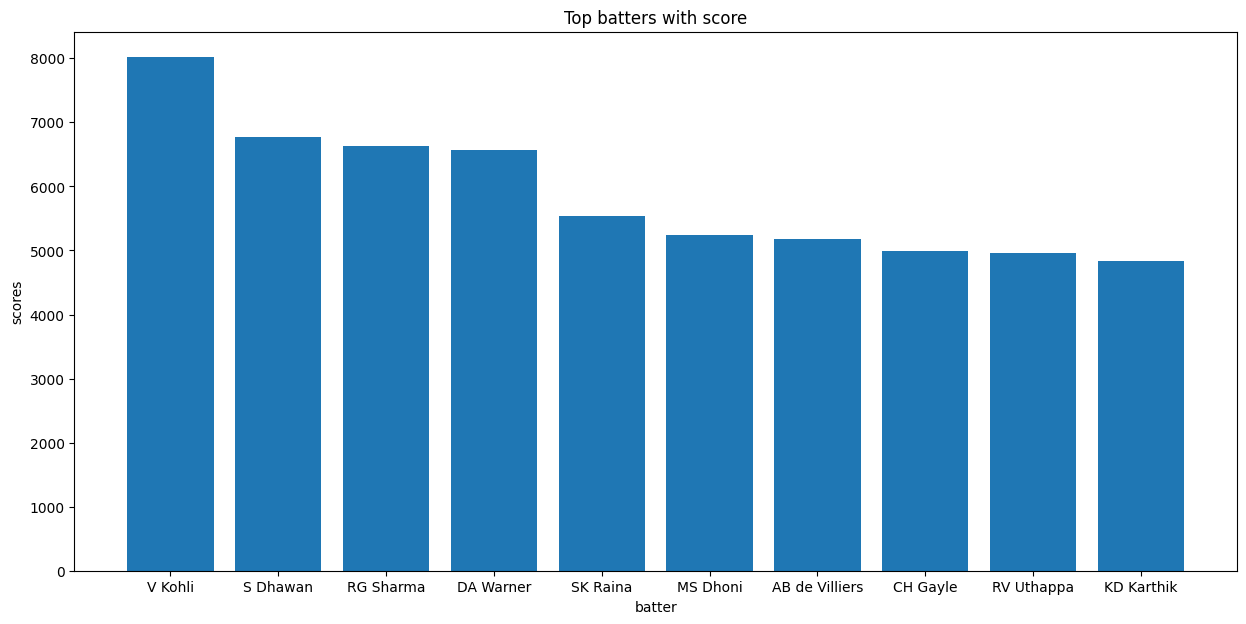

In [45]:
player=top_batter_scores['batter']
scores=top_batter_scores['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

In [46]:
#ARIMA MODEL FOR TOP 10 BATTER

In [47]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]

V Kohli
S Dhawan
RG Sharma
DA Warner
SK Raina
MS Dhoni
AB de Villiers
CH Gayle
RV Uthappa
KD Karthik


In [48]:
#preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)

IndentationError: unexpected indent (3958280649.py, line 2)

In [49]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  #preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)

V Kohli


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64
S Dhawan
221    34.077027
222    32.753423
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64
RG Sharma


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    26.263780
240    26.226535
241    26.231794
242    26.231051
243    26.231156
Name: predicted_mean, dtype: float64
DA Warner
184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64
SK Raina
200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64
MS Dhoni


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64
AB de Villiers
170    32.171063
171    30.361837
172    30.516449
173    30.503236
174    30.504366
Name: predicted_mean, dtype: float64
CH Gayle
141    31.122217
142    29.325195
143    29.513797
144    29.494003
145    29.496080
Name: predicted_mean, dtype: float64
RV Uthappa


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

197    21.230932
198    21.476908
199    21.479899
200    21.479935
201    21.479936
Name: predicted_mean, dtype: float64
KD Karthik
233    20.803250
234    20.558832
235    20.564926
236    20.564774
237    20.564778
Name: predicted_mean, dtype: float64


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4050609015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


In [50]:
def prepare_data_for_forecast(batter_data, batsman_name):
    print(f"Processing data for Batsman: {batsman_name}")
    player_data = batter_data[batter_data['batter'] == batsman_name].copy()
    player_data["match_number"] = range(len(player_data))
    player_data.set_index("match_number", inplace=True)
    print("Data prepared successfully.")
    return player_data


In [51]:
def split_train_test(player_data, column_name="batsman_runs", train_ratio=0.8):
    train_size = int(len(player_data) * train_ratio)
    train_data = player_data[column_name][:train_size]
    test_data = player_data[column_name][train_size:]
    print("Data split into train and test sets.")
    return train_data, test_data


In [52]:
def fit_arima_model(train_data, order=(1, 1, 1)):
    print("Fitting ARIMA model...")
    arima_model = ARIMA(train_data, order=order)
    model_fit = arima_model.fit()
    print("Model fitting completed.")
    return model_fit


In [53]:
def generate_forecast(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    print(f"Generated forecast for {steps} steps.")
    return forecast


In [54]:
def evaluate_model(test_data, test_forecast):
    mae = mean_absolute_error(test_data, test_forecast)
    mse = mean_squared_error(test_data, test_forecast)
    rmse = np.sqrt(mse)
    print("Evaluation completed:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return mae, mse, rmse


In [55]:
def forecast_for_batters(batter_data, top_batter_scores, arima_order=(1, 1, 1), forecast_steps=5):
    for i in range(len(top_batter_scores)):
        batsman_name = top_batter_scores.iloc[i]["batter"]

        # Step 1: Prepare Data
        player_data = prepare_data_for_forecast(batter_data, batsman_name)

        # Step 2: Split Data
        train_data, test_data = split_train_test(player_data)

        # Step 3: Fit ARIMA Model
        model_fit = fit_arima_model(train_data, arima_order)

        # Step 4: Generate Forecasts
        test_forecast = generate_forecast(model_fit, steps=len(test_data))
        future_forecast = generate_forecast(model_fit, steps=forecast_steps)

        # Step 5: Evaluate Model
        evaluate_model(test_data, test_forecast)

        # Display Results
        print("Future Forecasted Values (Next 5 Matches):")
        print(future_forecast)
        print("-" * 50)


In [56]:
forecast_for_batters(batter, top_batter_scores)


Processing data for Batsman: V Kohli
Data prepared successfully.
Data split into train and test sets.
Fitting ARIMA model...
Model fitting completed.
Generated forecast for 49 steps.
Generated forecast for 5 steps.


NameError: name 'mean_absolute_error' is not defined

In [57]:
#Prepare Data
player_data = prepare_data_for_forecast(batter, "Virat Kohli")
print(player_data.head())
#Split Data
train_data, test_data = split_train_test(player_data)
print(train_data.head(), test_data.head())
#Fit Model
model_fit = fit_arima_model(train_data)
test_forecast = generate_forecast(model_fit, steps=len(test_data))


Processing data for Batsman: Virat Kohli
Data prepared successfully.
Empty DataFrame
Columns: [match_id, batter, batsman_runs]
Index: []
Data split into train and test sets.
Series([], Name: batsman_runs, dtype: int64) Series([], Name: batsman_runs, dtype: int64)
Fitting ARIMA model...


C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: index -1 is out of bounds for axis 0 with size 0

In [58]:
#Prepare Data
player_data = prepare_data_for_forecast(batter, "Virat Kohli")
print(player_data.head())

Processing data for Batsman: Virat Kohli
Data prepared successfully.
Empty DataFrame
Columns: [match_id, batter, batsman_runs]
Index: []


In [59]:
#Split Data
train_data, test_data = split_train_test(player_data)
print(train_data.head(), test_data.head())

Data split into train and test sets.
Series([], Name: batsman_runs, dtype: int64) Series([], Name: batsman_runs, dtype: int64)


In [62]:
#Fit Model
model_fit = fit_arima_model(train_data)
test_forecast = generate_forecast(model_fit, steps=len(test_data))


Fitting ARIMA model...


C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: index -1 is out of bounds for axis 0 with size 0

In [63]:
#preparing data
dhoni=deliveries[deliveries.batter=="MS Dhoni"]
dhoni_score=dhoni.groupby('match_id')['batsman_runs'].sum().reset_index()
print(dhoni_score)
dhoni_score_sub=dhoni_score.head(239)
dhoni_score_sub
dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))
dhoni_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

     match_id  batsman_runs
0      335983             2
1      335989            30
2      335993            43
3      335996            65
4      336001            32
..        ...           ...
223   1426284             5
224   1426287            14
225   1426291             0
226   1426297            26
227   1426306            25

[228 rows x 2 columns]
239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


C:\Users\shata\AppData\Local\Temp\ipykernel_9072\4149516577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))


In [64]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

print(performance)

top_bowler = 'YS Chahal'
bowler_timeseries = performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)

bowler_timeseries = bowler_timeseries.sort_index()

       match_id         bowler  wickets  runs_conceded
0        335982      AA Noffke        1             41
1        335982     AB Agarkar        3             25
2        335982       AB Dinda        2              9
3        335982       CL White        0             24
4        335982       I Sharma        1             13
...         ...            ...      ...            ...
12973   1426312     PJ Cummins        1             18
12974   1426312      SP Narine        1             20
12975   1426312  Shahbaz Ahmed        1             28
12976   1426312    T Natarajan        0             29
12977   1426312       VG Arora        1             26

[12978 rows x 4 columns]
match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [65]:
model = ARIMA(bowler_timeseries, order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\shata\AppData\Local\Programs\Python\Python313\Lib

In [66]:
print(forecast)

159    1.006630
160    1.437891
161    1.202888
162    1.464672
163    1.206549
164    1.465166
165    1.206622
166    1.465170
167    1.206628
168    1.465165
Name: predicted_mean, dtype: float64


In [67]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


In [68]:
for i in range(len(top_bowlers)):
  bowler=top_bowlers.iloc[i]["bowler"]
  print(bowler)
  bscore=performance[performance['bowler']==bowler]
  print(bscore)

YS Chahal
       match_id     bowler  wickets  runs_conceded
4236     598029  YS Chahal        0             35
4782     729281  YS Chahal        1             18
4816     729287  YS Chahal        2             17
4889     729299  YS Chahal        1             26
4923     729305  YS Chahal        1             17
...         ...        ...      ...            ...
12793   1426294  YS Chahal        1             48
12851   1426299  YS Chahal        1             22
12890   1426303  YS Chahal        2             31
12952   1426310  YS Chahal        1             43
12965   1426311  YS Chahal        0             34

[159 rows x 4 columns]
DJ Bravo
       match_id    bowler  wickets  runs_conceded
84       335989  DJ Bravo        0             37
110      335991  DJ Bravo        0             27
146      335994  DJ Bravo        0             31
182      335997  DJ Bravo        1             25
267      336004  DJ Bravo        1             29
...         ...       ...      ...           

In [69]:
#ARIMA MODEL FOR TOP 10 BOWLERS

Text(0, 0.5, 'wickets')

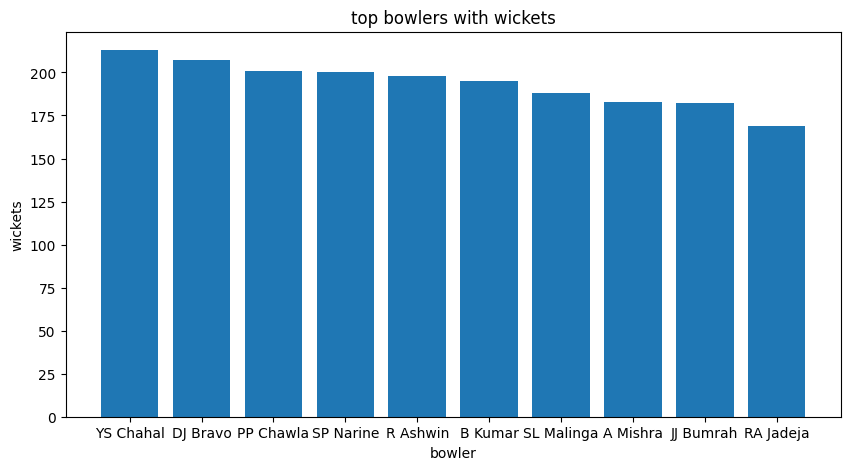

In [71]:
bowler=top_bowlers['bowler']
scores=top_bowlers['wickets']
fig = plt.figure(figsize = (10, 5))
plt.bar(bowler,scores)
plt.title('top bowlers with wickets')
plt.xlabel('bowler')
plt.ylabel('wickets')